In [1]:
#meta 10/19/2021 scikit-learn Pairwise Metrics - Distance, Affinities, Linear Kernel
#look at X & Y vs X only

In [2]:
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels, cosine_similarity


# Pairwise metrics, Affinities and Kernels
The `sklearn.metrics.pairwise` submodule implements utilities to evaluate pairwise distances or affinity of sets of samples.

Distance metrics are functions `d(a, b)` such that `d(a, b) < d(a, c)` if objects `a` and `b` are considered “more similar” than objects `a` and `c`. 

Kernels are measures of similarity, i.e. `s(a, b) > s(a, c)` if objects `a` and `b` are considered “more similar” than objects `a` and `c`.

There are a number of ways to convert between a distance metric and a similarity measure, such as a kernel.

## X & Y

In [3]:
X = np.array([[2, 3], [3, 5], [5, 8]])
Y = np.array([[1, 0], [2, 1]])

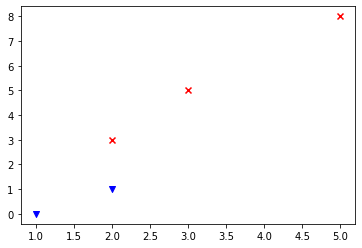

In [4]:
plt.scatter(X[:,0], X[:,1], marker='x', c='r')
plt.scatter(Y[:,0], Y[:,1], marker='v', c='b')

### Pairwise Distances: X & Y
The distances between the row vectors of `X` and the row vectors of `Y` can be evaluated using `pairwise_distances`. 

2-1 + 3-0   &   2-2 + 3-1  
3-1 + 5-0   &   3-2 + 5-1  
5-1 + 8-0   &   5-2 + 8-1  

In [5]:
#manhattan distance
pairwise_distances(X, Y, metric='manhattan')

array([[ 4.,  2.],
       [ 7.,  5.],
       [12., 10.]])

Smallest of the three: between X1 and Y2 = 2

### Pairwise  Kernels: X & Y
Similarly, `pairwise.pairwise_kernels` can be used to calculate the kernel between `X` and `Y` using different kernel functions. See the API reference for more details.

2x1 + 3x0   &   2x2 + 3x1  
3x1 + 5x0   &   3x2 + 5x1  
5x1 + 8x0   &   5x2 + 8x1 

In [6]:
#linear kernel
pairwise_kernels(X, Y, metric='linear')

array([[ 2.,  7.],
       [ 3., 11.],
       [ 5., 18.]])

Not useful

## X only

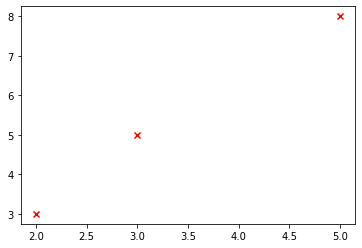

In [7]:
plt.scatter(X[:,0], X[:,1], marker='x', c='r')

## Pairwise Distances: X only
The distances between the row vectors of `X` and the row vectors of `Y` can be evaluated using `pairwise_distances`. If `Y` is omitted the pairwise distances of the row vectors of `X` are calculated. 

2-2 + 3-3   &   2-3 + 3-5  &  2-5 + 3-8  
3-2 + 5-3   &   3-3 + 5-5  &  3-5 + 5-8  
5-2 + 8-3   &   5-3 + 8-5  &  5-5 + 8-8  

In [8]:
#manhattan distance
pairwise_distances(X, metric='manhattan')

array([[0., 3., 8.],
       [3., 0., 5.],
       [8., 5., 0.]])

Smallest of the three: between X1 and X2 = 3

### Pairwise  Kernels: X only
Similarly, `pairwise.pairwise_kernels` can be used to calculate the kernel between `X` and `Y` using different kernel functions. See the API reference for more details.

2x2 + 3x3   &   2x3 + 3x5   &   2x5 + 3x8  
3x2 + 5x3   &   3x3 + 5x5   &   3x5 + 5x8  
5x2 + 8x3   &   5x3 + 8x5   &   5x5 + 8x8  

https://scikit-learn.org/stable/modules/metrics.html#linear-kernel

In [9]:
#linear kernel
t0 = time.time()
print(pairwise_kernels(X, metric='linear'))
print("Processing time: ", time.time() - t0)

[[13. 21. 34.]
 [21. 34. 55.]
 [34. 55. 89.]]
Processing time:  0.0015358924865722656


Smallest of the three: between X1 and X2 = 21

### Pairwise  Cosine Similarity: X only
This kernel is a popular choice for computing the similarity of documents represented as tf-idf vectors.  Computes the L2-normalized dot product of vectors  
https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity

In [10]:
#cosine sim
t0 = time.time()
print(cosine_similarity(X))
print("Processing time: ", time.time() - t0)

[[1.         0.99886814 0.99956775]
 [0.99886814 1.         0.99983475]
 [0.99956775 0.99983475 1.        ]]
Processing time:  0.0009889602661132812


Smallest of the three: between X1 and X2 = 0.99886814